In [1]:
import numpy as np
from pyrecode.params import InputParams, InitParams
from pyrecode.recode_server import ReCoDeServer
from pyrecode.recode_reader import ReCoDeReader, merge_parts
from PIL import Image

## Converting from TIFF to ReCoDe format

Initialise data and the desired parameters.
- Open the .tiff file in `tiff_data`
- Change parameters in `InitParams` accordingly:

`InitParams(mode, output_directory, image_filename='', directory_path='', calibration_filename='', params_filename='', validation_frame_gap=-1, log_filename='recode.log', run_name='run', verbosity=0, use_c=False, max_count=-1, chunk_time_in_sec=0)`

__Note:__ If `mode` in `InitParams` is changed to 'stream', `mode` in `ReCoDeServer` should be changed as well

In [2]:
tag = 'test'
tiff_data = np.array(Image.open('example.tiff'))
data = tiff_data[np.newaxis, :] # Reshape TIF frame into (nz, nx, ny) array
shape = np.shape(data)

calib_frame = np.zeros((shape[1], shape[2]), dtype=np.uint16)

init_params = InitParams('batch', '../TIFF', image_filename='test_data',
                             validation_frame_gap=2, log_filename='../TIFF/recode.log',
                             run_name=tag, verbosity=0, use_c=False)

input_params = InputParams()
input_params.load('../TIFF/recode_params_' + tag + '.txt')
input_params.nx = shape[1]
input_params.ny = shape[2]
input_params.nz = shape[0]
input_params.source_data_type = 0 # unsigned int
input_params.target_data_type = 0 # unsigned int

server = ReCoDeServer('batch')
run_metrics = server.run(init_params, input_params=input_params, dark_data=calib_frame, data=data)

# Merge intermediate files
merge_parts('../TIFF', 'test_data.rc1', 3)

Node 0 Ready at portNode 18534 
1 Ready at port 18535Node
 2 Ready at port 18536
(INFO) 07/16/2021-17:35:04 Logger : Logger is up and running  [Session ID:10132]
(INFO) 07/16/2021-17:35:04 Node 2 : Node 2 Waiting...  [Session ID:10132]
(INFO) 07/16/2021-17:35:04 Head Node : Welcome to this session  [Session ID:10132]
Node 0  Received:
{'session_id': 10132, 'type': 3, 'message': 'start', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 0, 'mapped_data': {'req_id': 1}}
ReCoDe Header
-------------Node
 uid1  = Received: 
158966344846346{'session_id': 10132, 'type': 3, 'message': 'start', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 1, 'mapped_data': {'req_id': 1}}

version_major =ReCoDe Header 
0-------------Node

 version_minoruid 2 = =  Received: 2
158966344846346

{'session_id': 10132, 'type': 3, 'message': 'start', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 2, 'mapped_data': {'req_id': 1}}is_interm

/home/amandakau/miniconda3/lib/python3.9/site-packages/pyrecode-0.1-py3.9-linux-x86_64.egg/pyrecode/recode_writer.py:353: UserWarning: Source data type either not as specified or does not match params specs. Attempting to cast.
  warnings.warn('Source data type either not as specified or does not match params specs. Attempting to cast.')


Node 1  Received:
{'session_id': 10132, 'type': 3, 'message': 'process_file', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 1, 'mapped_data': {'req_id': 2}}


/home/amandakau/miniconda3/lib/python3.9/site-packages/pyrecode-0.1-py3.9-linux-x86_64.egg/pyrecode/recode_writer.py:353: UserWarning: Source data type either not as specified or does not match params specs. Attempting to cast.
  warnings.warn('Source data type either not as specified or does not match params specs. Attempting to cast.')


Node(INFO) 07/16/2021-17:35:05 Node 1 : Processed 0 frames in 0:00:00.000017  [Session ID:10132] 
2(INFO) 07/16/2021-17:35:05 Node 1 : Node 1 Waiting...  [Session ID:10132] 
 Received:
{'session_id': 10132, 'type': 3, 'message': 'process_file', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 2, 'mapped_data': {'req_id': 2}}


/home/amandakau/miniconda3/lib/python3.9/site-packages/pyrecode-0.1-py3.9-linux-x86_64.egg/pyrecode/recode_writer.py:353: UserWarning: Source data type either not as specified or does not match params specs. Attempting to cast.
  warnings.warn('Source data type either not as specified or does not match params specs. Attempting to cast.')


(INFO) 07/16/2021-17:35:05 Node 2 : Processed 0 frames in 0:00:00.000016  [Session ID:10132]
Node(INFO) 07/16/2021-17:35:05 Node 2 : Node 2 Waiting...  [Session ID:10132] 
1  Received:
{'session_id': 10132, 'type': 3, 'message': 'close', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 1, 'mapped_data': {'req_id': 3}}
(INFO) 07/16/2021-17:35:05 Node 1 : Clean shutdown  [Session ID:10132]
Node 2  Received:
{'session_id': 10132, 'type': 3, 'message': 'close', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 2, 'mapped_data': {'req_id': 3}}
(INFO) 07/16/2021-17:35:05 Node 2 : Clean shutdown  [Session ID:10132]
RQM Received:
{'session_id': 10132, 'type': 2, 'message': 'ack', 'descriptive_message': '', 'source_process_id': 0, 'target_process_id': 0, 'mapped_data': {'req_id': 2}}
RQM sent to server 0 (port 18534 ):
{'session_id': 10132, 'type': 3, 'message': 'process_file', 'descriptive_message': '', 'source_process_id': 8514, 'target_proce

## Reading TIFF from ReCoDe file

ReCoDe file can be read using `ReCoDeReader`, which fetches frames in the form of a sparse COO matrix. This has to be converted to a Numpy array (np.uint8) for the TIFF format.

In [3]:
recode_file_name = '../TIFF/test_data.rc1'
reader = ReCoDeReader(recode_file_name, is_intermediate=False)
reader.open()

ReCoDe Header
-------------
uid = 158966344846346
version_major = 0
version_minor = 2
is_intermediate = 1
reduction_level = 1
rc_operation_mode = 1
is_bit_packed = 1
target_bit_depth = 12
nx = 200
ny = 200
nz = 1
frame_metadata_size = 0
num_non_standard_frame_metadata = 0
L2_statistics = 0
L4_centroiding = 0
compression_scheme = 0
compression_level = 1
source_file_type = 0
source_header_length = 0
source_header_position = 0
source_file_name = test_data                                                                                           
calibration_file_name =                                                                                                     
calibration_threshold_epsilon = 0
has_calibration_data = 1
frame_offset = 0
calibration_frame_offset = 0
num_calibration_frames = 1
source_bit_depth = 12
source_dtype = 0
target_dtype = 0
checksum = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
futures = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

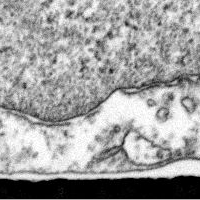

In [4]:
#Fetch one frame
frame = reader.get_next_frame()

if frame == None:
    print("Reached end of file - no remaining frames to view.")
else:
    frame_id = list(frame.keys())[0]
    data = frame[frame_id]['data'] # COO matrix
    dense_array = data.todense().astype(np.uint8) # Convert to Numpy dense array

Image.fromarray(dense_array)

---

## Converting from TIFF Stack to ReCoDe format

In [5]:
# A TIFF stack may be built from a series of .tiff files.

import tifffile as tif

im1 = np.array(Image.open('../TIFF/stack_example/NESb_C2_TP1.tiff'))
shape = np.shape(im1)
stack = np.zeros((10, shape[0], shape[1]), dtype = np.uint8)

for i in range(1, 10):
    im = np.array(Image.open('../TIFF/stack_example/NESb_C2_TP' + str(i) + '.tiff'))
    stack[i-1] = im
    
tif.imsave('../TIFF/stack_example/stack.tif', stack.astype('uint16'), bigtiff=True)

Initialise data and the desired parameters. The method of reading the stack file differs slightly from the previous .tiff file.

In [6]:
from skimage import io

tag = 'test'
data = io.imread('../TIFF/stack_example/stack.tif')
shape = np.shape(data)

calib_frame = np.zeros((shape[1], shape[2]), dtype=np.uint16)

init_params = InitParams('batch', '../TIFF/stack_example/', image_filename='test_data',
                             validation_frame_gap=2, log_filename='../TIFF/stack_example/recode.log',
                             run_name=tag, verbosity=0, use_c=False)

input_params = InputParams()
input_params.load('../TIFF/recode_params_' + tag + '.txt')
input_params.nx = shape[1]
input_params.ny = shape[2]
input_params.nz = shape[0]
input_params.source_data_type = 0 # unsigned int
input_params.target_data_type = 0 # unsigned int

server = ReCoDeServer('batch')
run_metrics = server.run(init_params, input_params=input_params, dark_data=calib_frame, data=data)

# Merge intermediate files
merge_parts('../TIFF/stack_example/', 'test_data.rc1', 3)

Node 0 Ready at port Node18534 
1 Ready at port Node18535
 2 Ready at port 18536
(INFO) 07/16/2021-17:35:29 Logger : Logger is up and running  [Session ID:10526]
(INFO) 07/16/2021-17:35:29 Node 0 : Node 0 Waiting...  [Session ID:10526]
(INFO) 07/16/2021-17:35:29 Node 1 : Node 1 Waiting...  [Session ID:10526]
(INFO) 07/16/2021-17:35:29 Node 2 : Node 2 Waiting...  [Session ID:10526]
(INFO) 07/16/2021-17:35:29 Head Node : Welcome to this session  [Session ID:10526]
Node 0  Received:
{'session_id': 10526, 'type': 3, 'message': 'start', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 0, 'mapped_data': {'req_id': 1}}
ReCoDe Header
-------------Node
 uid1  = Received: 
158966344846346{'session_id': 10526, 'type': 3, 'message': 'start', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 1, 'mapped_data': {'req_id': 1}}

version_major =ReCoDe Header Node
0 -------------
2
version_minor uid Received:  
=={'session_id': 10526, 'type': 3, 'message

(INFO) 07/16/2021-17:35:31 Node 2 : Processed 2 frames in 0:00:00.811572  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 2 : Estimated dose rate = 0.00860595703125  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 2 : Node 2 Waiting...  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 1 : Processed 4 frames in 0:00:00.903947  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 1 : Estimated dose rate = 0.009765625  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 1 : Node 1 Waiting...  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 0 : Processed 4 frames in 0:00:00.936026  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 0 : Estimated dose rate = 0.0091552734375  [Session ID:10526]
(INFO) 07/16/2021-17:35:31 Node 0 : Node 0 Waiting...  [Session ID:10526]
Node 0  Received:
{'session_id': 10526, 'type': 3, 'message': 'close', 'descriptive_message': '', 'source_process_id': 8514, 'target_process_id': 0, 'mapped_data': {'req_id': 3}}
Node(INFO) 07/16/2021-17:35:31 Node 0 : C

Similarly, the ReCoDe file can be read using ReCoDeReader as shown above.